<a href="https://colab.research.google.com/github/Gkemhcs/deeplearning-pytorch-notebooks/blob/main/cnn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install torchvision torchmetrics torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 50.4 MB/s eta 0:00:00


In [2]:
import torchvision ,torch
import torchvision.transforms.v2 as T
import matplotlib.pyplot as plt
import torchmetrics
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

In [3]:
toTensor = T.Compose([T.ToImage(), T.ToDtype(torch.float32, scale=True)])
train_dataset=torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=toTensor)
test_and_valid_dataset=torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=toTensor)

  8%|▊         | 13.4M/170M [00:02<00:32, 4.87MB/s]


KeyboardInterrupt: 

In [11]:
train_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
                 ToImage()
                 ToDtype(scale=True)
           )

In [21]:
len(test_dataset)

5000

In [20]:
test_dataset,valid_dataset=torch.utils.data.random_split(test_and_valid_dataset, [5000, 5000])


In [22]:
train_dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [24]:
train_dataset[0][1]

6

In [25]:
torch.manual_seed(42)

In [29]:

grid_size=4
def plot_images_and_labels(dataset):
    num_images = grid_size * grid_size
    indices = torch.randperm(len(dataset))[:num_images]

    images, labels = zip(*[dataset[i] for i in indices])

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size, grid_size))

    for i, ax in enumerate(axes.flat):
        img = images[i].permute(1, 2, 0).numpy()  # C,H,W -> H,W,C
        ax.imshow(img)
        ax.set_title(dataset.classes[labels[i]], fontsize=8)
        ax.axis('off')

    plt.tight_layout()

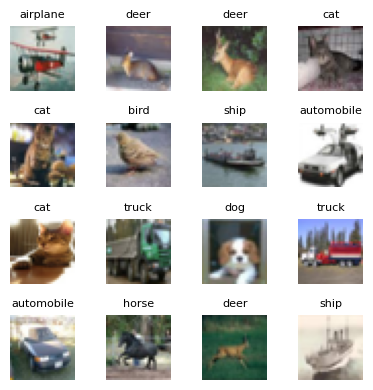

In [30]:
plot_images_and_labels(train_dataset)

In [33]:
train_dataset[0][0].shape

torch.Size([3, 32, 32])

In [35]:
from PIL import Image

In [38]:
!curl -o truck.webp https://image.made-in-china.com/2f0j00pAeoRtrGRQcT/5-7-Ton-Light-Hand-Drive-Lorry-Box-Truck-Isu-Zu-Small-Cargo-Trucks.webp

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 31800  100 31800    0     0   215k      0 --:--:-- --:--:-- --:--:--  215k


In [39]:
truck_img=Image.open('truck.webp')

In [44]:
type(truck_img)

PIL.WebPImagePlugin.WebPImageFile

In [46]:
comp=T.Compose([T.ToImage(), T.ToDtype(torch.float32, scale=True)])
truck_im=comp(truck_img)

In [49]:
truck_im.shape

torch.Size([3, 800, 800])

In [57]:
resizes_truck=T.Resize((32,32))(truck_im)

In [58]:
resizes_truck.shape

torch.Size([3, 32, 32])

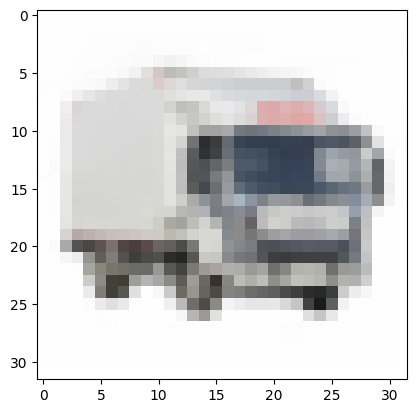

In [60]:
plt.imshow(resizes_truck.permute(1,2,0))

In [4]:
from torchvision.models.resnet import ResNet18_Weights
transform=ResNet18_Weights.DEFAULT.transforms()
toTensor = T.Compose([transform])
train_toTensor = T.Compose([T.RandomPhotometricDistort(),transform])
train_dataset=torchvision.datasets.OxfordIIITPet(root="./pets",download=True,split="trainval",target_types="category",transform=toTensor)

100%|██████████| 792M/792M [00:36<00:00, 21.4MB/s]
100%|██████████| 19.2M/19.2M [00:01<00:00, 10.2MB/s]


In [5]:
test_dataset=torchvision.datasets.OxfordIIITPet(root="./pets",download=True,split="test",target_types="category",transform=toTensor)

In [6]:
valid_dataset,test_dataset=torch.utils.data.random_split(test_dataset, [2000,1669])

In [7]:
len(test_dataset)

1669

In [8]:
classes=train_dataset.classes

In [10]:
train_dataset[0][0].shape

torch.Size([3, 224, 224])

In [11]:
grid_size=4
def plot_images_and_labels(dataset):
    num_images = grid_size * grid_size
    indices = torch.randperm(len(dataset))[:num_images]

    images, labels = zip(*[dataset[i] for i in indices])

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size*2.5, grid_size*2.5))

    for i, ax in enumerate(axes.flat):
        img = images[i].permute(1, 2, 0).numpy()  # C,H,W -> H,W,C
        ax.imshow(img)
        ax.set_title(dataset.classes[labels[i]], fontsize=8)
        ax.axis('off')

    plt.tight_layout()

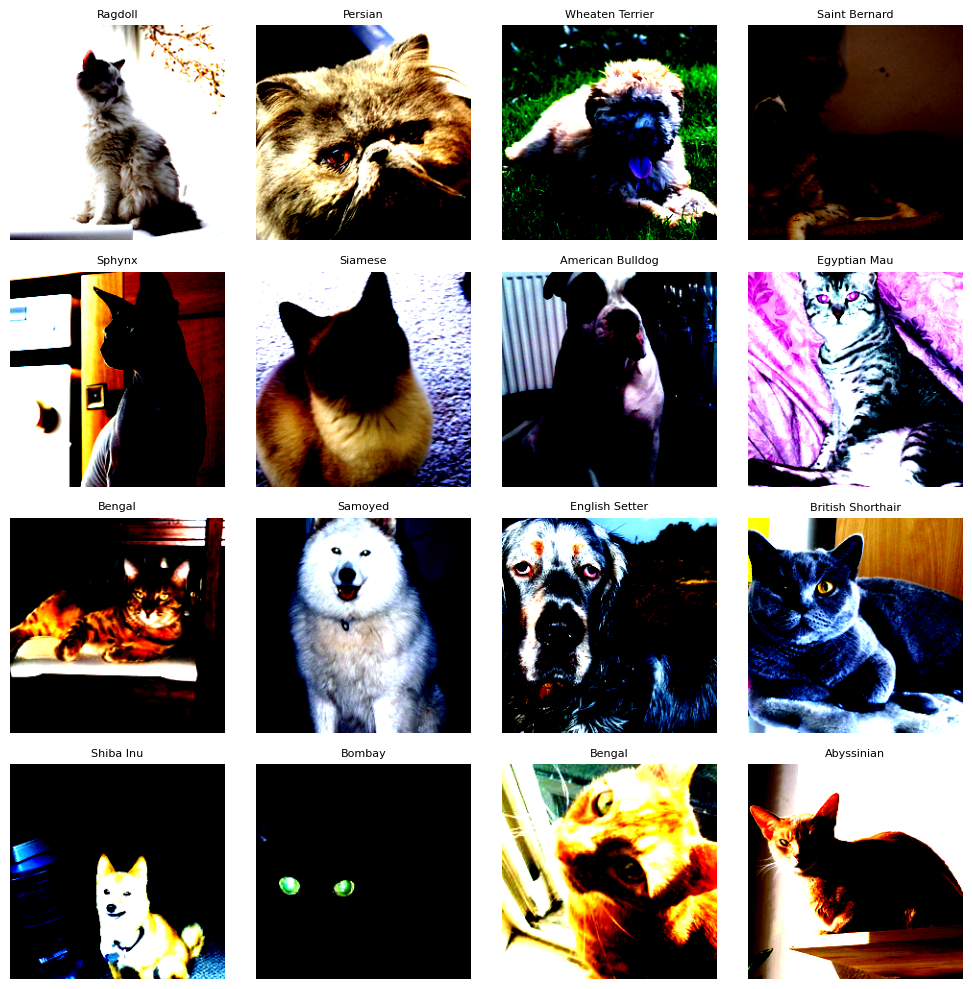

In [12]:
plot_images_and_labels(train_dataset)

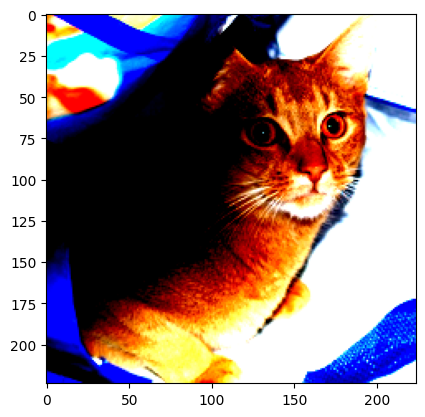

In [14]:
plt.imshow(train_dataset[0][0].permute(1,2,0))

In [85]:
train_dataset[0][0].shape

torch.Size([3, 500, 394])

(np.float64(-0.5), np.float64(393.5), np.float64(499.5), np.float64(-0.5))

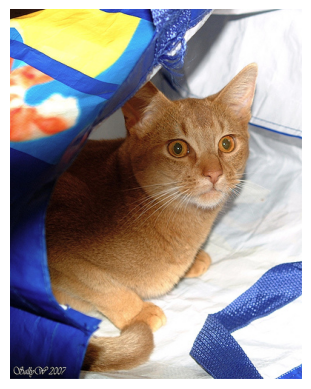

In [92]:
plt.imshow(train_dataset[0][0].permute(1,2,0))
plt.axis("off")

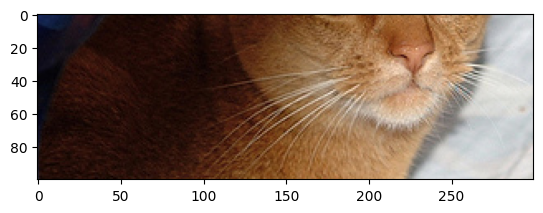

In [99]:
centered_img=T.CenterCrop([100,300])(train_dataset[0][0])
plt.imshow(centered_img.permute(1,2,0))

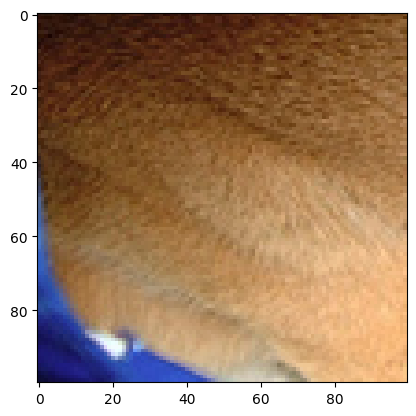

In [106]:
random_crop=T.RandomCrop([100,100])(train_dataset[0][0])
plt.imshow(random_crop.permute(1,2,0))

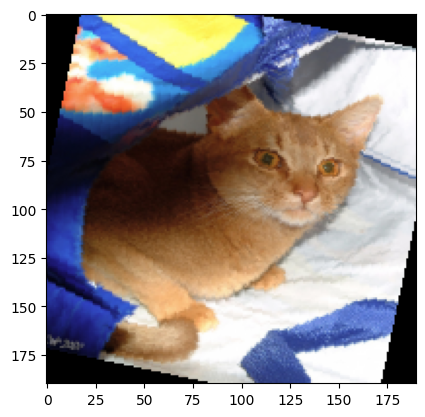

In [22]:
r_r=T.RandomRotation(degrees=90)(train_dataset[0][0])
plt.imshow(r_r.permute(1,2,0))

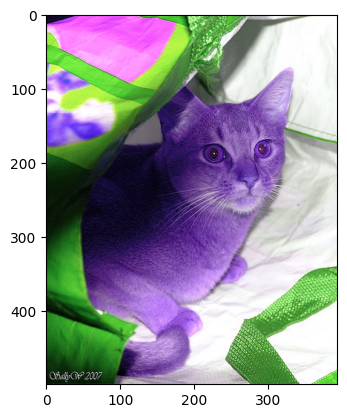

In [115]:
chan_ch=T.RandomChannelPermutation()(train_dataset[0][0])
plt.imshow(chan_ch.permute(1,2,0))


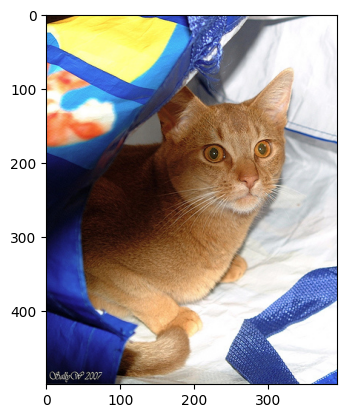

In [122]:
zoom_img=T.RandomZoomOut()(train_dataset[0][0])
plt.imshow(zoom_img.permute(1,2,0))

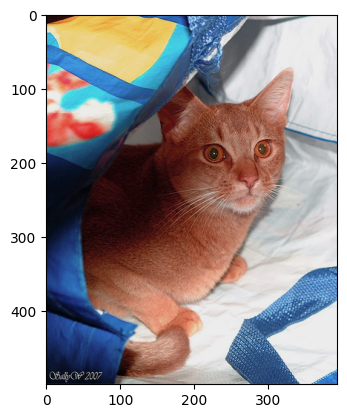

In [130]:
distort=T.RandomPhotometricDistort()(train_dataset[0][0])
plt.imshow(distort.permute(1,2,0))

In [133]:
train_dataset[0][0].shape

torch.Size([3, 500, 394])

In [34]:
class FlattenCNN(nn.Module):
  def __init__(self,input_size:int,output_size:int):
    super().__init__()
    self.flatten=nn.Flatten()
    self.hidden_layer=nn.Sequential(
        nn.Linear(input_size,50),
        nn.ReLU(),
        nn.Linear(50,50),
        nn.ReLU(),

    )
    self.classification_layer=nn.Linear(50,output_size)

  def forward(self,x):
    flatten_x=self.flatten(x)
    hidden_x=self.hidden_layer(flatten_x)
    return self.classification_layer(hidden_x)


In [27]:
size=torch.prod(torch.tensor(train_dataset[0][0].shape))

In [28]:
size

tensor(108300)

In [32]:
classes=len(train_dataset.classes)

In [68]:
model=FlattenCNN(size,classes)

In [69]:
optimizer=torch.optim.Adam(model.parameters(),lr=1e-3)

In [70]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [41]:
loss=nn.CrossEntropyLoss()

In [30]:
train_loader=DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=64)
valid_loader=DataLoader(valid_dataset,batch_size=64)

In [28]:
def evaluate(model,valid_loader,eval_metric:torchmetrics.Accuracy,device):
  model.eval()
  eval_metric.reset()
  model.to()
  with torch.no_grad():
    for x,y in valid_loader:
      x=x.to(device)
      y=y.to(device)
      y_pred=model(x)
      eval_metric.update(y_pred,y)
  return eval_metric.compute()


In [27]:
def train(
    model,
    optimizer,
    criterion,
    train_loader,
    device,
    valid_loader,
    eval_metric,
    epochs=5,
):
    model.to(device)

    for epoch in range(epochs):
        model.train()
        total_loss = 0.0

        for x, y in train_loader:
            x = x.to(device)
            y = y.to(device)

            optimizer.zero_grad()

            y_pred = model(x)
            loss = criterion(y_pred, y)

            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        val_accuracy=evaluate(model,valid_loader,eval_metric,device)

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Val Acuuracy:{val_accuracy}")



In [72]:
accuracy=torchmetrics.Accuracy(task="multiclass",num_classes=classes).to(torch.device("cuda"))
train(model,optimizer,loss,train_loader,torch.device("cuda"),valid_loader,accuracy)

Epoch [1/5], Loss: 4.9978, Val Acuuracy:0.025499999523162842
Epoch [2/5], Loss: 3.6117, Val Acuuracy:0.029999999329447746
Epoch [3/5], Loss: 3.6046, Val Acuuracy:0.03750000149011612
Epoch [4/5], Loss: 3.5887, Val Acuuracy:0.03799999877810478
Epoch [5/5], Loss: 3.5580, Val Acuuracy:0.0430000014603138


In [ ]:
test_accuracy = evaluate(model, test_loader, accuracy, torch.device("cuda"))
print(f"Test Accuracy: {test_accuracy:.4f}")

In [67]:
torch.device("cuda")

device(type='cuda')

In [74]:
train_dataset[0][0].shape

torch.Size([3, 190, 190])

In [77]:
train_dataset[0][0].unsqueeze(0).shape

torch.Size([1, 3, 190, 190])

In [79]:
y=model.to(torch.device("cuda"))(train_dataset[0][0].unsqueeze(0).to(torch.device("cuda")))

In [91]:
y.argmax()

tensor(14, device='cuda:0')

In [92]:
train_dataset.classes[y.argmax()]

'German Shorthaired'

In [93]:
train_dataset.classes[train_dataset[0][1]]

'Abyssinian'

In [94]:
train_dataset[0][0].shape

torch.Size([3, 190, 190])

In [95]:
class CNNModel(nn.Module):
  def __init__(self,input_shape,output_shape):
    super().__init__()
    self.cnn_layers=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=32,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2),
        nn.Conv2d(in_channels=32,out_channels=64,kernel_size=5),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2),
    )
    self.flatten=nn.Flatten()
    self.classification_layer=nn.Sequential(
        nn.Linear(64*45*45, 128),
        nn.ReLU(),
        nn.Linear(128, output_shape)
    )
  def forward(self,input):
    x=self.cnn_layers(input)
    x=self.flatten(x)
    return self.classification_layer(x)


In [100]:
model=CNNModel(3,classes)

In [101]:
optimizer=torch.optim.AdamW(model.parameters(),lr=1e-3)

In [102]:
loss=nn.CrossEntropyLoss()
accuracy=torchmetrics.Accuracy(task="multiclass",num_classes=classes).to(torch.device("cuda"))

In [103]:
train(model,optimizer,loss,train_loader,torch.device("cuda"),valid_loader,accuracy)

Epoch [1/5], Loss: 3.7869, Val Acuuracy:0.03999999910593033
Epoch [2/5], Loss: 3.4610, Val Acuuracy:0.06300000101327896
Epoch [3/5], Loss: 3.3569, Val Acuuracy:0.06449999660253525
Epoch [4/5], Loss: 3.2702, Val Acuuracy:0.06400000303983688
Epoch [5/5], Loss: 3.1700, Val Acuuracy:0.0729999989271164


In [107]:
for name,child in model.named_children():
  print(f"{name}:-",child)

cnn_layers:- Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
flatten:- Flatten(start_dim=1, end_dim=-1)
classification_layer:- Sequential(
  (0): Linear(in_features=129600, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=37, bias=True)
)


In [15]:
from torchvision.models.resnet import ResNet18_Weights
from torchvision.models.resnet import resnet18

In [16]:
model=resnet18(weights=ResNet18_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 221MB/s]


In [17]:
for name,child in model.named_children():
    print(f"{name}:- ",child)

conv1:-  Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
bn1:-  BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
relu:-  ReLU(inplace=True)
maxpool:-  MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
layer1:-  Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3

In [19]:
model.fc=nn.Linear(512,len(classes))

In [20]:
for name,child in model.named_children():
    print(f"{name}:- ",child)

conv1:-  Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
bn1:-  BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
relu:-  ReLU(inplace=True)
maxpool:-  MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
layer1:-  Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3

**disabling the graident for lower layers**

In [21]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

conv1.weight True
bn1.weight True
bn1.bias True
layer1.0.conv1.weight True
layer1.0.bn1.weight True
layer1.0.bn1.bias True
layer1.0.conv2.weight True
layer1.0.bn2.weight True
layer1.0.bn2.bias True
layer1.1.conv1.weight True
layer1.1.bn1.weight True
layer1.1.bn1.bias True
layer1.1.conv2.weight True
layer1.1.bn2.weight True
layer1.1.bn2.bias True
layer2.0.conv1.weight True
layer2.0.bn1.weight True
layer2.0.bn1.bias True
layer2.0.conv2.weight True
layer2.0.bn2.weight True
layer2.0.bn2.bias True
layer2.0.downsample.0.weight True
layer2.0.downsample.1.weight True
layer2.0.downsample.1.bias True
layer2.1.conv1.weight True
layer2.1.bn1.weight True
layer2.1.bn1.bias True
layer2.1.conv2.weight True
layer2.1.bn2.weight True
layer2.1.bn2.bias True
layer3.0.conv1.weight True
layer3.0.bn1.weight True
layer3.0.bn1.bias True
layer3.0.conv2.weight True
layer3.0.bn2.weight True
layer3.0.bn2.bias True
layer3.0.downsample.0.weight True
layer3.0.downsample.1.weight True
layer3.0.downsample.1.bias True
la

In [22]:
for param in model.parameters():
  param.requires_grad=False

In [23]:
for param in model.fc.parameters():
  param.requires_grad=True

In [24]:
optimizer=torch.optim.AdamW(model.parameters(),lr=1e-3)

In [31]:
loss=nn.CrossEntropyLoss()
accuracy=torchmetrics.Accuracy(task="multiclass",num_classes=len(classes)).to(torch.device("cuda"))
train(model,optimizer,loss,train_loader,torch.device("cuda"),valid_loader,accuracy,epochs=20)

Epoch [1/20], Loss: 2.1304, Val Acuuracy:0.7745000123977661
Epoch [2/20], Loss: 0.8318, Val Acuuracy:0.8510000109672546
Epoch [3/20], Loss: 0.5497, Val Acuuracy:0.8585000038146973
Epoch [4/20], Loss: 0.4356, Val Acuuracy:0.8705000281333923
Epoch [5/20], Loss: 0.3554, Val Acuuracy:0.8675000071525574
Epoch [6/20], Loss: 0.3069, Val Acuuracy:0.8805000185966492
Epoch [7/20], Loss: 0.2737, Val Acuuracy:0.8755000233650208
Epoch [8/20], Loss: 0.2407, Val Acuuracy:0.8784999847412109
Epoch [9/20], Loss: 0.2142, Val Acuuracy:0.8830000162124634
Epoch [10/20], Loss: 0.1994, Val Acuuracy:0.8769999742507935
Epoch [11/20], Loss: 0.1864, Val Acuuracy:0.875
Epoch [12/20], Loss: 0.1710, Val Acuuracy:0.8759999871253967
Epoch [13/20], Loss: 0.1557, Val Acuuracy:0.8855000138282776
Epoch [14/20], Loss: 0.1438, Val Acuuracy:0.8809999823570251
Epoch [15/20], Loss: 0.1371, Val Acuuracy:0.8794999718666077
Epoch [16/20], Loss: 0.1222, Val Acuuracy:0.8815000057220459
Epoch [17/20], Loss: 0.1185, Val Acuuracy:0.88

In [141]:
train(model,optimizer,loss,train_loader,torch.device("cuda"),valid_loader,accuracy,epochs=20)

Epoch [1/20], Loss: 0.1200, Val Acuuracy:0.8295000195503235
Epoch [2/20], Loss: 0.1134, Val Acuuracy:0.8324999809265137
Epoch [3/20], Loss: 0.1090, Val Acuuracy:0.828000009059906
Epoch [4/20], Loss: 0.1050, Val Acuuracy:0.8349999785423279
Epoch [5/20], Loss: 0.1012, Val Acuuracy:0.8324999809265137
Epoch [6/20], Loss: 0.0926, Val Acuuracy:0.8379999995231628
Epoch [7/20], Loss: 0.0897, Val Acuuracy:0.8379999995231628
Epoch [8/20], Loss: 0.0876, Val Acuuracy:0.8330000042915344
Epoch [9/20], Loss: 0.0808, Val Acuuracy:0.8299999833106995
Epoch [10/20], Loss: 0.0770, Val Acuuracy:0.8349999785423279
Epoch [11/20], Loss: 0.0725, Val Acuuracy:0.828000009059906
Epoch [12/20], Loss: 0.0707, Val Acuuracy:0.8345000147819519
Epoch [13/20], Loss: 0.0701, Val Acuuracy:0.8345000147819519
Epoch [14/20], Loss: 0.0677, Val Acuuracy:0.8349999785423279
Epoch [15/20], Loss: 0.0638, Val Acuuracy:0.8339999914169312
Epoch [16/20], Loss: 0.0617, Val Acuuracy:0.8374999761581421
Epoch [17/20], Loss: 0.0606, Val Ac

KeyboardInterrupt: 

In [33]:
print("test accuracy:- ",evaluate(model,test_loader,accuracy,torch.device("cuda")))

test accuracy:-  tensor(0.8922, device='cuda:0')


In [45]:
y=model.to(torch.device("cuda"))(train_dataset[1003][0].unsqueeze(dim=0).to(torch.device("cuda")))

In [46]:
classes[y.argmax()]

'Maine Coon'

In [47]:
classes[train_dataset[1003][1]]

'Maine Coon'

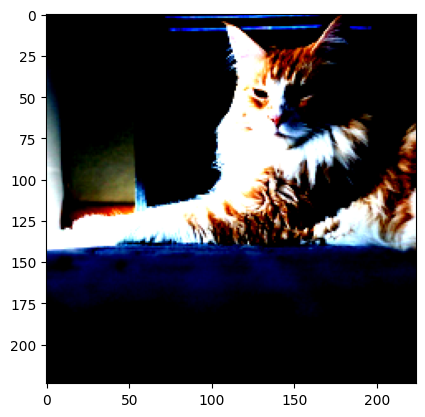

In [48]:
plt.imshow(train_dataset[1003][0].permute(1,2,0))

In [49]:
classes

['Abyssinian',
 'American Bulldog',
 'American Pit Bull Terrier',
 'Basset Hound',
 'Beagle',
 'Bengal',
 'Birman',
 'Bombay',
 'Boxer',
 'British Shorthair',
 'Chihuahua',
 'Egyptian Mau',
 'English Cocker Spaniel',
 'English Setter',
 'German Shorthaired',
 'Great Pyrenees',
 'Havanese',
 'Japanese Chin',
 'Keeshond',
 'Leonberger',
 'Maine Coon',
 'Miniature Pinscher',
 'Newfoundland',
 'Persian',
 'Pomeranian',
 'Pug',
 'Ragdoll',
 'Russian Blue',
 'Saint Bernard',
 'Samoyed',
 'Scottish Terrier',
 'Shiba Inu',
 'Siamese',
 'Sphynx',
 'Staffordshire Bull Terrier',
 'Wheaten Terrier',
 'Yorkshire Terrier']

In [50]:
! curl -o ragdoll.jpg "https://upload.wikimedia.org/wikipedia/commons/6/64/Ragdoll_from_Gatil_Ragbelas.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 49985  100 49985    0     0   684k      0 --:--:-- --:--:-- --:--:--  677k


In [52]:
from PIL import Image

In [54]:
r_img=Image.open("ragdoll.jpg")

In [57]:
img=T.ToImage()(r_img)

In [58]:
img.shape

torch.Size([3, 872, 921])

In [59]:
t_img=transform(img)

In [61]:
t_img.shape

torch.Size([3, 224, 224])

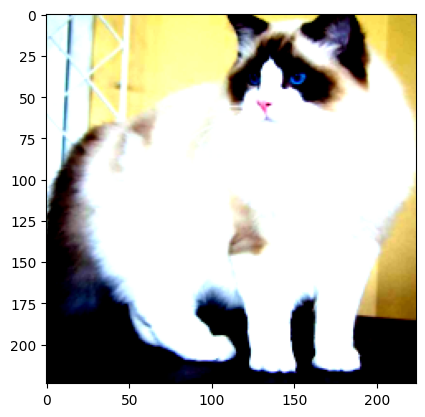

In [62]:
plt.imshow(t_img.permute(1,2,0))

In [63]:
y=model(t_img.unsqueeze(dim=0).to(torch.device("cuda")))

In [64]:
classes[y.argmax()]

'Ragdoll'

In [68]:
t_im=T.Resize((224,224))(img)

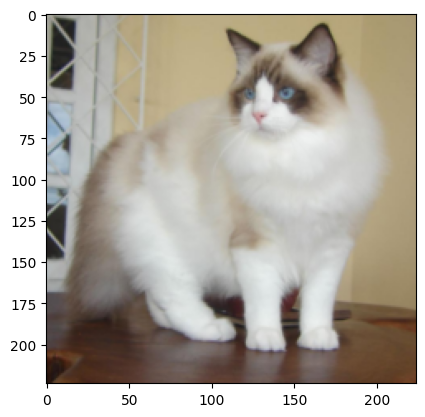

In [69]:
plt.imshow(t_im.permute(1,2,0))

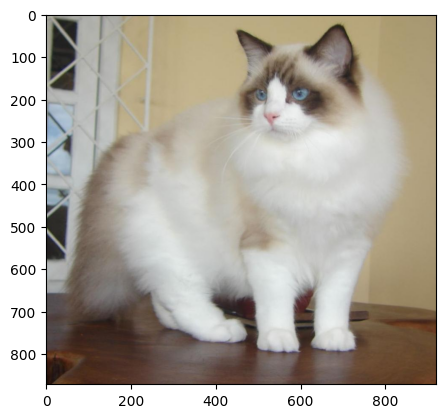

In [70]:
plt.imshow(img.permute(1,2,0))

In [72]:
img.shape

torch.Size([3, 872, 921])

In [74]:
y=model(t_img.unsqueeze(dim=0).to(torch.device("cuda")))

In [75]:
classes[y.argmax()]

'Ragdoll'